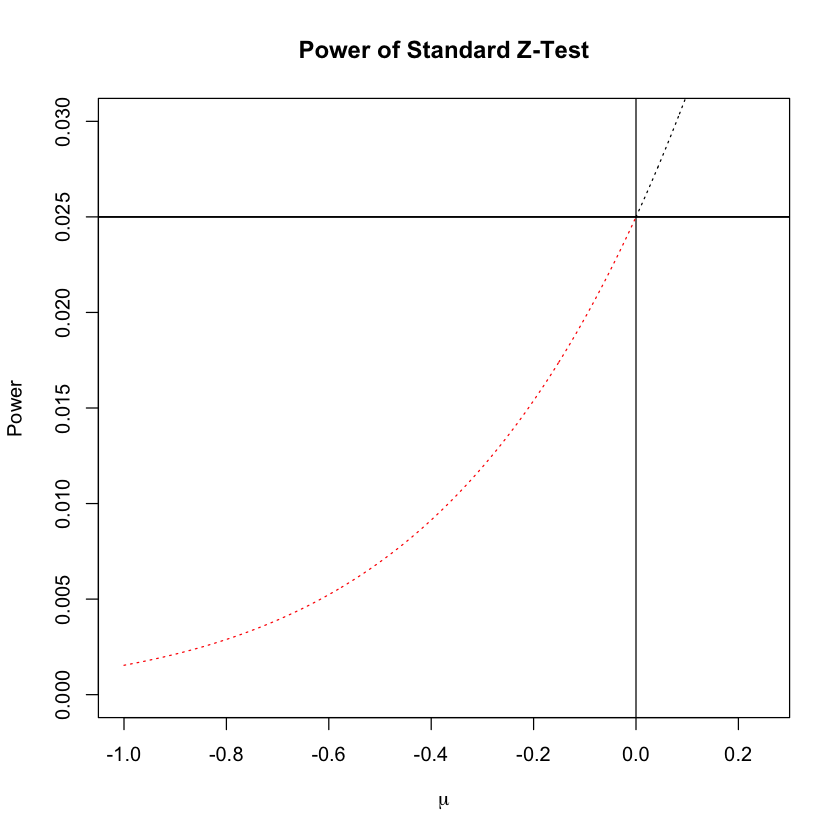

In [1]:
# This generates the graphics for the FDA talk on September 8, 2021
# I am now ALSO using it to generate graphics for our submission paper!

# Graphic 1: Power curve for normal test (zeroing out at mu = 0). Sparse point set. As if you had infinitely many Monte Carlo samples!
npoints = 3
mu = seq(-1,0, length.out = npoints)
stepsize = mu[2] - mu[1]
mu= mu - stepsize/2
pow = 1 - pnorm(- mu + 1.96)
plot(type = "n",x = mu, y = pow, cex = .5, ylim = c(0, .03), xlim = c(-1,0.25),
       xlab = expression(mu),ylab = "Power", main = "Power of Standard Z-Test")
abline(a = .025, b = 0)
abline(a = 0, b = 999999)

#draw type I Error portion
temp_mu = seq(-1,0, length.out = npoints*100)
pow_temp_mu = 1 - pnorm(- temp_mu + 1.96)
lines(x = temp_mu, y = pow_temp_mu, lty = 3, col = "red")
abline(a = .025,b =0)

#draw power portion
temp_mu = seq(0,.1, length.out = npoints*100)
pow_temp_mu = 1 - pnorm(- temp_mu + 1.96)
lines(x = temp_mu, y = pow_temp_mu, lty = 3)
abline(a = .025,b =0)

In [ ]:


################# Graphic 2: An example of our upper bound
#require(plotrix)

set.seed(150)
npoints = 10
mu = seq(-1,0, length.out = npoints)
stepsize = mu[2] - mu[1]
mu= mu - stepsize/2
pow = 1 - pnorm(- mu + 1.96)
plot(type= 'n', x = mu, y = pow, cex = .5, ylim = c(0, .03), xlim = c(-1,0.05),
     xlab = "True Value of mu",ylab = "Power", main = "Confidence Bands on Power of Standard Z-Test")
abline(a = .025, b = 0)
abline(a = 0, b = 999999)


epsilon = .001
mu_plus_eps = mu + epsilon
pow_plus_eps = 1 - pnorm(- mu_plus_eps + 1.96)
pow_derivative = (pow_plus_eps - pow)/epsilon

pow_rand = pow+rnorm(length(pow))/sqrt(10^6) + 3*sqrt(.5/(10^6)) #random variance is a bit too large but whatever
pow_rand_low = pow_rand - 6*sqrt(.5/(10^6))
pow_derivative_rand = (pow_plus_eps - pow)/epsilon + rnorm(length(pow))/sqrt(10^6) + 3*sqrt(1/(10^6)) #random variance is a bit too large but whatever
pow_derivative_rand_low = pow_derivative_rand - 3*sqrt(1/(10^6)) #random variance is a bit too large but whatever

#upper = pow + pow_derivative*stepsize/2
#lower = pow - pow_derivative*stepsize/2

temp_mu = seq(-1,0, length.out = npoints*100)
pow_temp_mu = 1 - pnorm(- temp_mu + 1.96)
lines(x = temp_mu, y = pow_temp_mu, lty = 3)

penalty_length = 20
penalized_sequence <- seq(-.5,.5, length.out = penalty_length)

for(i in 2:npoints){
  penalized_bound = pow_rand[i] + pow_derivative_rand[i]*stepsize*penalized_sequence + (1/2)*(stepsize^2)*(penalized_sequence)^2
  penalized_bound_low = pow_rand_low[i] + pow_derivative_rand_low[i]*stepsize*penalized_sequence - (1/2)*(stepsize^2)*(penalized_sequence)^2
  lines(x = mu[i] + stepsize*penalized_sequence, y = penalized_bound_low)
  lines(x = mu[i] + stepsize*penalized_sequence, y = penalized_bound)
}


########################################


#### Graphic 3: Basic confidence Interval

npoints = 3
mu = seq(-1,0, length.out = npoints)
stepsize = mu[2] - mu[1]
mu= mu - stepsize/2
pow = 1 - pnorm(- mu + 1.96)
set.seed(150)
error = rnorm(length(pow))*(1/2)*(1/100)*sqrt(pow * (1 - pow)) 

plot(x = mu, y = pow + error, cex = 1, ylim = c(0, .03), xlim = c(-1,0.25),
     xlab = "True Value of mu",ylab = "Power", main = "Power of Standard Normal Test")
abline(a = .025, b = 0)
abline(a = 0, b = 999999)
######

uplimit = pow + error + (1/100)*sqrt(pow * (1 - pow))
lowlimit = pow + error - (1/100)*sqrt(pow * (1 - pow))
plotCI(mu, pow + error, ui = uplimit, li=lowlimit, add = TRUE)

#draw power portion

temp_mu = seq(-1,0, length.out = npoints*100)
pow_temp_mu = 1 - pnorm(- temp_mu + 1.96)
lines(x = temp_mu, y = pow_temp_mu, lty = 3, col = "red")
#abline(a = .025,b =0)


#Graphic 4: Confidence Intervals for the First Derivative
set.seed(150)
npoints = 3
mu = seq(-1,0, length.out = npoints)
stepsize = mu[2] - mu[1]
mu= mu - stepsize/2
pow = 1 - pnorm(- mu + qnorm(.975))
plot(type='n', axes = 'false', x = mu, y = pow, cex = 1, ylim = c(0, .03), xlim = c(-1,0.05),
     xlab = "True Value of mu",ylab = "Power", main = "Confidence Intervals for First Derivative")
abline(a = .025, b = 0)
abline(a = 0, b = 999999)
######

#uplimit = pow + (1/100)*sqrt(pow * (1 - pow))
#lowlimit = pow - (1/100)*sqrt(pow * (1 - pow))
#plotCI(mu, pow, ui = uplimit, li=lowlimit, add = TRUE)

epsilon = .001
mu_plus_eps = mu + epsilon
pow_plus_eps = 1 - pnorm(- mu_plus_eps + qnorm(.975))
pow_derivative = (pow_plus_eps - pow)/epsilon
pow_derivative_rand = pow_derivative + rnorm(length(pow))/sqrt(10^6)  #random variance is a bit too large but whatever


width = 1/100
vertical = (1/100)*sqrt(pow * (1 - pow))*0
for(i in 1:npoints){
  x = c(mu[i] , mu[i] , mu[i] + stepsize/2 , mu[i]+stepsize/2)
  y = c(pow[i] - vertical[i], pow[i] + vertical[i],
        pow[i] + (stepsize/2)*pow_derivative_rand[i] + width*stepsize/2 + vertical[i], 
        pow[i] + (stepsize/2)*pow_derivative_rand[i] - width*stepsize/2 - vertical[i])
  polygon(x,y,border=NA,col=blues9[3])
}
for(i in 1:npoints){
  x = c(mu[i], mu[i], mu[i] - stepsize/2, mu[i] - stepsize/2)
  y = c(pow[i] - vertical[i], pow[i] + vertical[i], 
        pow[i] - (stepsize/2)*pow_derivative_rand[i] + width*stepsize/2 + vertical[i], 
        pow[i] - (stepsize/2)*pow_derivative_rand[i] - width*stepsize/2 - vertical[i])
  polygon(x,y,border=NA,col=blues9[3])
}
#plotCI(mu, pow, ui = uplimit, li=lowlimit, add = TRUE)

temp_mu = seq(-1,0, length.out = npoints*100)
pow_temp_mu = 1 - pnorm(- temp_mu + 1.96)
lines(x = temp_mu, y = pow_temp_mu, lty = 3, col = "black")

# Graphic 5: pushing down critical value


set.seed(150)
npoints = 10 #for graphic 5, use 3; for graphic 6, use 30
mu = seq(-1,0, length.out = npoints)
stepsize = mu[2] - mu[1]
mu= mu - stepsize/2
pow = 1 - pnorm(- mu + 2.02)
plot(type= 'n', x = mu, y = pow, cex = .5, ylim = c(0, .03), xlim = c(-1,0.05),
     xlab = "True Value of mu",ylab = "Power", main = "Power of Tuned Z-Test : z > 2.02")
abline(a = .025, b = 0)
abline(a = 0, b = 999999)

epsilon = .001
mu_plus_eps = mu + epsilon
pow_plus_eps = 1 - pnorm(- mu_plus_eps + 2.02)
pow_derivative = (pow_plus_eps - pow)/epsilon

pow_rand = pow+rnorm(length(pow))/sqrt(10^6) + 3*sqrt(.5/(10^6)) #random variance is a bit too large but whatever
pow_rand_low = pow_rand - 6*sqrt(.5/(10^6))
pow_derivative_rand = (pow_plus_eps - pow)/epsilon + rnorm(length(pow))/sqrt(10^6) + 3*sqrt(1/(10^6)) #random variance is a bit too large but whatever
pow_derivative_rand_low = pow_derivative_rand - 3*sqrt(1/(10^6)) #random variance is a bit too large but whatever

#upper = pow + pow_derivative*stepsize/2
#lower = pow - pow_derivative*stepsize/2

temp_mu = seq(-1,0, length.out = npoints*100)
pow_temp_mu = 1 - pnorm(- temp_mu + 2.02)
lines(x = temp_mu, y = pow_temp_mu, lty = 3)

penalty_length = 20
penalized_sequence <- seq(-.5,.5, length.out = penalty_length)

for(i in 2:npoints){
  penalized_bound = pow_rand[i] + pow_derivative_rand[i]*stepsize*penalized_sequence + (1/2)*(stepsize^2)*(penalized_sequence)^2
  penalized_bound_low = pow_rand_low[i] + pow_derivative_rand_low[i]*stepsize*penalized_sequence - (1/2)*(stepsize^2)*(penalized_sequence)^2
  lines(x = mu[i] + stepsize*penalized_sequence, y = penalized_bound_low)
  lines(x = mu[i] + stepsize*penalized_sequence, y = penalized_bound)
}

max(penalized_sequence)



# Graphic 4:

npoints = 3
mu = seq(-1,0, length.out = npoints)
stepsize = mu[2] - mu[1]
mu= mu - stepsize/2
pow = 1 - pnorm(- mu + qnorm(.975))
plot(x = mu, y = pow, cex = .5, ylim = c(0, .03), xlim = c(-1,0.25),
     xlab = "True Value of mu",ylab = "Type I Error", main = "Type I Error of Standard Normal Test")
abline(a = .025, b = 0)
abline(a = 0, b = 999999)


#  Using the first derivative, add knowledge of the slope. Represent this as lines, going in each direction, through the relevant points
epsilon = .001
mu_plus_eps = mu + epsilon
pow_plus_eps = 1 - pnorm(- mu_plus_eps + qnorm(.975))
pow_derivative = (pow_plus_eps - pow)/epsilon

upper = pow + pow_derivative*stepsize/2
lower = pow - pow_derivative*stepsize/2

for(i in 1:npoints){
  lines(x = mu[i] + stepsize*c(-.5,.5), y = c(lower[i],upper[i]))
}

#. But this is an approximation, not a rigorous upper bound!
# Graphic 3b: Add a plot of the true type I Error over top!
temp_mu = seq(-1,0, length.out = npoints*100)
pow_temp_mu = 1 - pnorm(- temp_mu + qnorm(.975))
lines(x = temp_mu, y = pow_temp_mu, lty = 3)


# Graphic 3c: Show that Taylor's theorem describes the error of this approximation
index_point<- length(temp_mu)*15/16
x_point = temp_mu[index_point]
y_point = pow_temp_mu[index_point]
points(x_point, y_point)

x_diff = x_point - mu[length(mu)]
y_diff = y_point - (pow[length(mu)] + pow_derivative[length(mu)]*(x_diff))

x_temp = rep(NA, 50)
y_temp = rep(NA, 50)
s = seq(0,x_diff, length.out = 50)
for(i in 1:50){
  x_temp[i] = x_point - x_diff + s[i]
  y_temp[i] = pow[length(mu)] + s[i]*pow_derivative[length(mu)]+ (y_diff)*(s[i]/x_diff)^2
}
lines(x_temp, y_temp)

# Graphic 4: Add a quadratic curve to the linear point! This is now a rigorous upper bound function.
#Note: I believe the upper bound on the second derivative is equal to 1. The taylor penalty is equal to d^2/2

penalty_length = 20
penalized_sequence <- seq(-.5,.5, length.out = penalty_length)
  
for(i in 1:npoints){
      penalized_bound = pow[i] + pow_derivative[i]*stepsize*penalized_sequence + (1/2)*(stepsize^2)*(penalized_sequence)^2
      lines(x = mu[i] + stepsize*penalized_sequence, y = penalized_bound)
}

# Graphics 5-8: animate how much better this gets as we change the number of points, showing that it rapidly converges!

smooth_out = function(npoints){
  
  #Copy/pasted the above!
  
  #npoints = 3
  mu = seq(-1,0, length.out = npoints)
  stepsize = mu[2] - mu[1]
  mu= mu - stepsize/2
  pow = 1 - pnorm(- mu + qnorm(.975))
  plot(x = mu, y = pow, cex = .5, ylim = c(0, .03), xlim = c(-1,0.25),
       xlab = "True Value of mu",ylab = "Type I Error", main = "Type I Error of Standard Normal Test")
  abline(a = .025, b = 0)
  abline(a = 0, b = 999999)
  
  
epsilon = .001
mu_plus_eps = mu + epsilon
pow_plus_eps = 1 - pnorm(- mu_plus_eps + qnorm(.975))
pow_derivative = (pow_plus_eps - pow)/epsilon

upper = pow + pow_derivative*stepsize/2
lower = pow - pow_derivative*stepsize/2

for(i in 1:npoints){
  lines(x = mu[i] + stepsize*c(-.5,.5), y = c(lower[i],upper[i]))
}


temp_mu = seq(-1,0, length.out = npoints*100)
pow_temp_mu = 1 - pnorm(- temp_mu + qnorm(.975))
lines(x = temp_mu, y = pow_temp_mu, lty = 3)

penalty_length = 20
penalized_sequence <- seq(-.5,.5, length.out = penalty_length)

for(i in 1:npoints){
  penalized_bound = pow[i] + pow_derivative[i]*stepsize*penalized_sequence + (1/2)*(stepsize^2)*(penalized_sequence)^2
  lines(x = mu[i] + stepsize*penalized_sequence, y = penalized_bound)
}
}

smooth_out(3)
smooth_out(5)
smooth_out(10)
smooth_out(20)
smooth_out(40)

# Ok, that is how you would do it in 1 dimension!
# Except, wait, we don't actually know this 0th order and 1st order information. What should we do instead?
# We can make confidence intervals for both of them!
# The 0th order, the point estimates here, are what you're used to seeing estimated by Monte Carlo 

# [Insert new graphic - the points, with vertical confidence band]

# The first order, the point estimates here, can actually be estimated with Monte Carlo as well - 
# The estimator we need to use here, is a certain type of score estimator

# It turns out that we can bound these
# [Insert new graphic - the points are corners of triangles, which have shaded-in arcs of the area 
# that can be reached by the score confidence interval]


#Graphic 8 : error bars on Monte Carlo

#install.packages("plotrix")
require(plotrix)

#### Copied from previous!
npoints = 3
mu = seq(-1,0, length.out = npoints)
stepsize = mu[2] - mu[1]
mu= mu - stepsize/2
pow = 1 - pnorm(- mu + qnorm(.975))
plot(x = mu, y = pow, cex = 1, ylim = c(0, .03), xlim = c(-1,0.25),
     xlab = "True Value of mu",ylab = "Type I Error", main = "Type I Error of Standard Normal Test")
abline(a = .025, b = 0)
abline(a = 0, b = 999999)
######

uplimit = pow + (1/100)*sqrt(pow * (1 - pow))
lowlimit = pow - (1/100)*sqrt(pow * (1 - pow))
plotCI(mu, pow, ui = uplimit, li=lowlimit, add = TRUE)


#Graphic 9: error bars on the score estimate

epsilon = .001
mu_plus_eps = mu + epsilon
pow_plus_eps = 1 - pnorm(- mu_plus_eps + qnorm(.975))
pow_derivative = (pow_plus_eps - pow)/epsilon

width = 1/100
vertical = (1/100)*sqrt(pow * (1 - pow))
for(i in 1:npoints){
  x = c(mu[i] , mu[i] , mu[i] + stepsize/2 , mu[i]+stepsize/2)
  y = c(pow[i] - vertical[i], pow[i] + vertical[i],
        pow[i] + (stepsize/2)*pow_derivative[i] + width*stepsize/2 + vertical[i], 
        pow[i] + (stepsize/2)*pow_derivative[i] - width*stepsize/2 - vertical[i])
  polygon(x,y,border=NA,col=blues9[3])
}
for(i in 1:npoints){
  x = c(mu[i], mu[i], mu[i] - stepsize/2, mu[i] - stepsize/2)
  y = c(pow[i] - vertical[i], pow[i] + vertical[i], 
        pow[i] - (stepsize/2)*pow_derivative[i] + width*stepsize/2 + vertical[i], 
        pow[i] - (stepsize/2)*pow_derivative[i] - width*stepsize/2 - vertical[i])
  polygon(x,y,border=NA,col=blues9[3])
}
plotCI(mu, pow, ui = uplimit, li=lowlimit, add = TRUE)

# In order to come up with a final overall bound:
# we can take a 1 - delta/2 confidence bound in Monte Carlo for the 0th order;
# a 1 - delta/2 confidence bound in Monte Carlo for the score;
# and, using this process, compute the worst upper bound over both of those confidence intervals.